In [1]:
import numpy as np
import pandas as pd
from math import log
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
import json
import nltk
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
sns.set()

In [2]:
# Create the list of topics/article doamins
path =r"D:/Codes/Jupyter/Machine Learning/Newspaper Classifier MNB/20_newsgroups/"
os.chdir(path)
# Store the name of all folder of dataset as domain names into an array
topics = os.listdir()

The r is placed before filename to prevent the characters in filename string to be treated as special character. For example, if there is \temp in the file address, then \t is treated as the tab character and error is raised of invalid address. The r makes the string raw, that is, it tells that the string is without any special characters. The r can be ignored if the file is in same directory and address is not being placed.

In [3]:
def refine(data):
    symbolString = "`~!@#$%^&*-_+)(\\][}{|;:'\",<.>/?1234567890"
    mytable = data.maketrans("", "", symbolString)
    data = data.translate(mytable)
    return data

# Splitting the text files into test and train sets.

In [8]:
#  For every subfolder take 80% of the documents i.e. 800 documents, read them, and store all the text in one single file 
#  by the name subfolder_train.txt
def createTrainFiles():
    
    for topic in topics:

    #     Find the path for folders of each topic
        srcFolderPath = path + topic
        destFolderPath = r"D:/Codes/Jupyter/Machine Learning/Newspaper Classifier MNB/Training Set/" + topic
        os.mkdir(destFolderPath)
        os.chdir(srcFolderPath)

    #     Create Files by the name subfolder_train.txt that will save all the 800 newsfiles under each topic as one single document
    #     in append mode
        with open(r"D:/Codes/Jupyter/Machine Learning/Newspaper Classifier MNB/Training Set/" + topic + "Train.txt", 'a') as trainFile:
            for file in os.listdir()[:800]:
                srcFilePath = srcFolderPath + '/' + str(file)
                destFilepath = destFolderPath + '/' + file + '.txt'

    #             Copy the files from the source path to their destination path
                shutil.copyfile(srcFilePath, destFilepath)
                
    #             Read the first 800 file in the Topic Folder.
                with open(srcFilePath, 'r') as textFile:
                    data = textFile.read()

    #                 Eliminate redundant symbols and digits from the read file
                    data = refine(data)
        
    #                 Append the data to the training file
                    trainFile.write(data)   

        print(topic, "train file created")

In [10]:
createTrainFiles()

alt.atheism train file created
comp.graphics train file created
comp.os.ms-windows.misc train file created
comp.sys.ibm.pc.hardware train file created
comp.sys.mac.hardware train file created
comp.windows.x train file created
misc.forsale train file created
rec.autos train file created
rec.motorcycles train file created
rec.sport.baseball train file created
rec.sport.hockey train file created
sci.crypt train file created
sci.electronics train file created
sci.med train file created
sci.space train file created
soc.religion.christian train file created
talk.politics.guns train file created
talk.politics.mideast train file created
talk.politics.misc train file created
talk.religion.misc train file created


In [14]:
# For every subfolder take the remaining 20% of the documents i.e. 200 documents and copy them to a new subfolder by the
# name subfolder_test
def createTestFiles():
    for topic in topics:

    #     Define the source and destination folder paths
        srcFolderPath = path + topic
        destFolderPath = r"D:/Codes/Jupyter/Machine Learning/Newspaper Classifier MNB/Testing Set/" + topic

    #     Make new Folder for Destination
        os.mkdir(destFolderPath)
        os.chdir(srcFolderPath)    
        for file in os.listdir()[800:]:
            filePath = srcFolderPath + '/' + str(file)             
                
    #         Define the source and destination file paths
            srcFilePath = srcFolderPath + '/' + file
            destFilepath = destFolderPath + '/' + file + '.txt'

    #         Copy the files from the source path to their destination path
            shutil.copyfile(srcFilePath, destFilepath)

        print(topic, "test file created")

In [16]:
createTestFiles()

alt.atheism test file created
comp.graphics test file created
comp.os.ms-windows.misc test file created
comp.sys.ibm.pc.hardware test file created
comp.sys.mac.hardware test file created
comp.windows.x test file created
misc.forsale test file created
rec.autos test file created
rec.motorcycles test file created
rec.sport.baseball test file created
rec.sport.hockey test file created
sci.crypt test file created
sci.electronics test file created
sci.med test file created
sci.space test file created
soc.religion.christian test file created
talk.politics.guns test file created
talk.politics.mideast test file created
talk.politics.misc test file created
talk.religion.misc test file created


# Creating a dictionary for every Topic/Fitting

In [4]:
# Create Dictionaries for every domain and store them as json files locally for easier access
# Fit the Classifier using Train Data
def fitAndStore():
    # Store the stop words in a set to discard redundant words
    stopWords = set(stopwords.words('english'))
    wordDict = {}
    for topic in topics:

    #     Initiate the sub dictionary
        wordDict[topic] = {}

    #     Open the traing data file in read mode
        with open(r"D:/Codes/Jupyter/Machine Learning/Newspaper Classifier MNB/Training Set/" + topic + "Train.txt", 'r') as trainFile:

    #         Store all words in the form of an array
            data = trainFile.read().split()
            for word in data:
                word = word.lower()

    #             Skip words if they are stop words else add to/update the dictionary 
                if word in stopWords:
                    continue
                else:
                    if word in wordDict[topic].keys():
                        wordDict[topic][word] += 1
                    else:
                        wordDict[topic][word] = 1
    #     Sort the sub-dictionaries by the frequency of words in descending order
        wordDict[topic] = {key: value for key, value in sorted(wordDict[topic].items(), key=lambda item:item[1], reverse=True)}
        
    # Dump and store the dictionary in JSON format for easier and instant access later
    jsonData = json.dumps(wordDict)
    with open(r"D:/Codes/Jupyter/Machine Learning/Newspaper Classifier MNB/WordDict.json", 'w') as outfile:
        outfile.write(jsonData)

In [5]:
fitAndStore()

# Implement Multinomial NB

In [6]:
def wordAnalyser():
    with open(r"D:/Codes/Jupyter/Machine Learning/Newspaper Classifier MNB/WordDict.json", 'r') as jsonfile:
        wordDict = json.load(jsonfile)
    for key in wordDict.keys():
        y = wordDict[key].values()
        plt.plot(y)
        plt.title(key)
        plt.show()

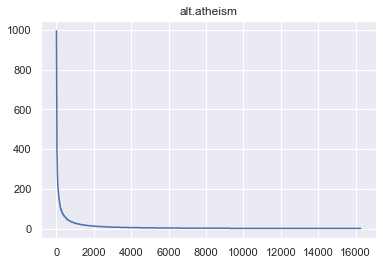

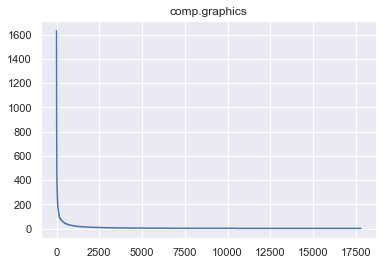

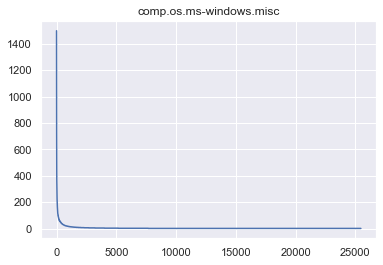

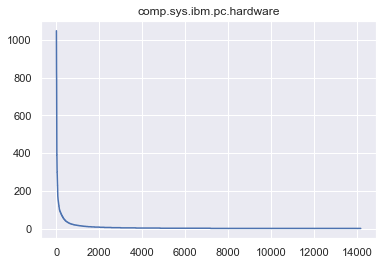

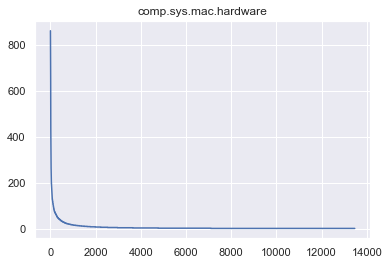

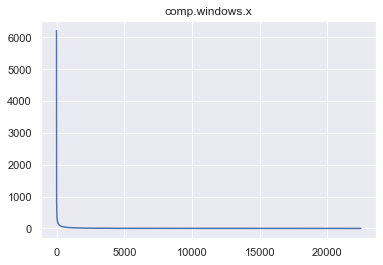

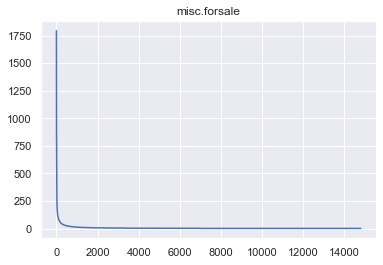

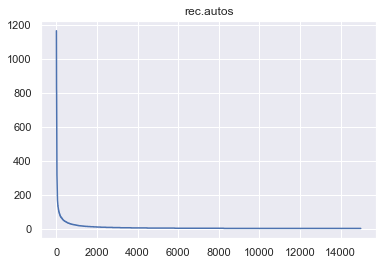

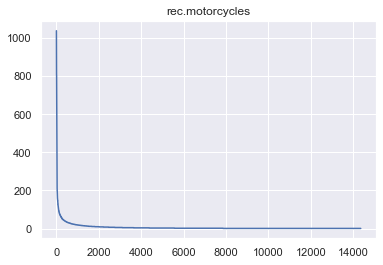

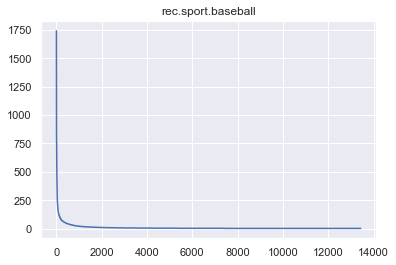

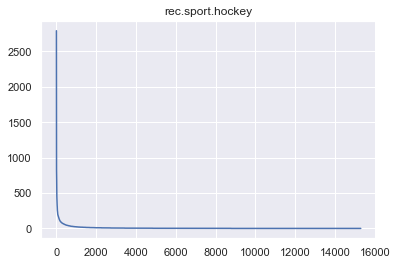

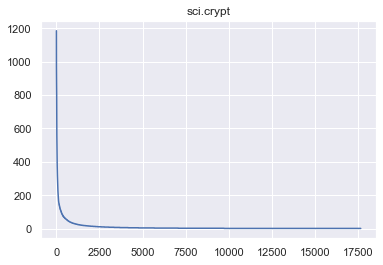

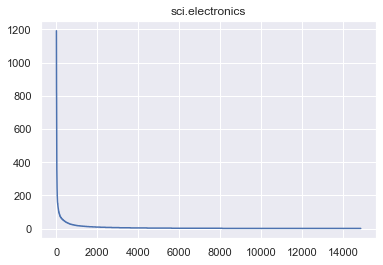

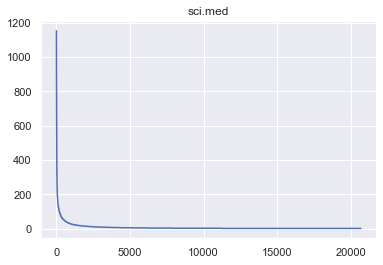

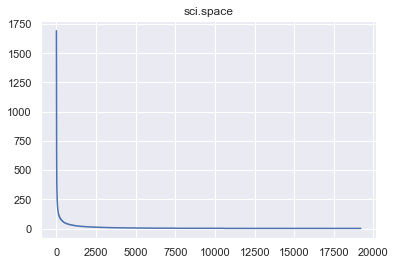

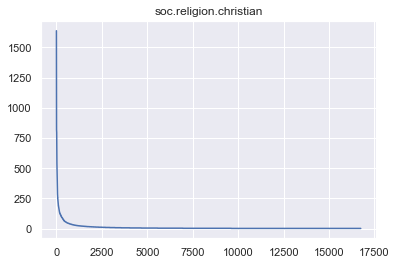

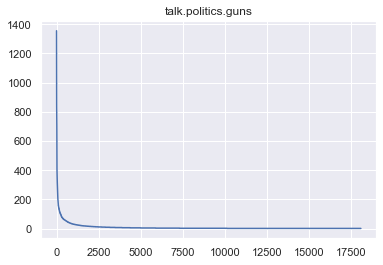

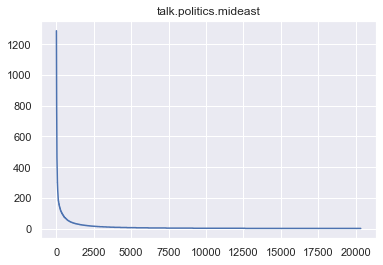

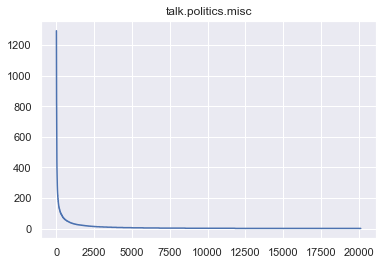

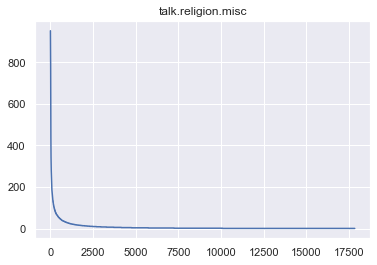

In [7]:
wordAnalyser()

In [8]:
def finalFitting(vocab):
    wordDict = {}
    with open(r"D:/Codes/Jupyter/Machine Learning/Newspaper Classifier MNB/WordDict.json", 'r') as jsonfile:
        wordDict = json.load(jsonfile)
        
    finalDic = {}
    for key in wordDict.keys():
        finalDic[key] = dict(tuple(wordDict[key].items())[:vocab])
        finalDic[key]["__TotalNumberOfWords"] = sum(finalDic[key].values())
    return finalDic

In [9]:
vocab = int(input("Enter Number of words in the vocabulary for every domain: "))
finalDic = finalFitting(vocab)

Enter Number of words in the vocabulary for every domain: 2500


# Predicting and Determining the efficiency

In [10]:
# Convert data into processible form 
# Convert sentances into list of words

def createFeaturesAndTargetArray(type, finalDic):
    # Initiate empty lists
    X = []
    Y = []
    
    #Source data according to need i.e. training data or testing data
    folderPath = r"D:/Codes/Jupyter/Machine Learning/Newspaper Classifier MNB/"
    if type.lower() == "test":
        folderPath += "Testing Set/"
    elif type.lower() == "train":
        folderPath += "Training Set/"
        
    # create an entry in the array for every document of every domain
    for topic in topics:
        srcFolderPath = folderPath + topic
        os.chdir(srcFolderPath)
        
        for file in os.listdir():
            srcFilePath = srcFolderPath + '/' + str(file)
            
            # Read file
            with open(srcFilePath, 'r') as textFile:
                data = textFile.read()
                
                # Clean the data
                data = refine(data).split()
                tempWordList = []
                
                for word in data:
                    # If the word exists in the vocapulary add it to the list else ignore
                    if word in finalDic[topic]:
                        tempWordList.append(word)
                    else:
                        continue
                X.append(np.array(tempWordList, dtype=object))
                Y.append(topic)
    
    X = np.array(X, dtype=object)
    Y = np.array(Y)
    return X, Y

In [11]:
x_train, y_train = createFeaturesAndTargetArray("train", finalDic)
x_test, y_test = createFeaturesAndTargetArray("test", finalDic)

In [12]:
# Predict the domain for all the newspapers in the testing dataset using logarithmic probability and multinomial NB
def predict(x_test):
    y_pred = []
    
    # For every list of words predict its domain type
    for data in x_test:
        probdic = {}
        for word in data:   
            for _topic in topics:

                # Find the logarithmic probability of the sentence for every topic.
                if word in finalDic[_topic]:
                    wordProb = log(finalDic[_topic][word] + 1) - log(finalDic[_topic]["__TotalNumberOfWords"] + len(finalDic[_topic]))
                else:
                    wordProb = log(1) - log(finalDic[_topic]["__TotalNumberOfWords"] + len(finalDic[_topic]))

                if _topic in probdic:
                    probdic[_topic] += wordProb
                else:
                    probdic[_topic] = wordProb

        # Choose the topic with the highest probability.                
        prediction = max(zip(probdic.values(), probdic.keys()))[1]

        # Send predicted data for performance analysis
        y_pred.append(prediction)
    return y_pred

In [13]:
y_pred = predict(x_test)

# Classification Report of own Model

In [14]:
print(classification_report(y_test, y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.89      0.92      0.91       200
           comp.graphics       0.90      0.95      0.93       200
 comp.os.ms-windows.misc       0.90      0.80      0.85       200
comp.sys.ibm.pc.hardware       0.93      0.96      0.94       200
   comp.sys.mac.hardware       0.97      0.96      0.97       200
          comp.windows.x       0.92      0.93      0.93       200
            misc.forsale       0.96      0.96      0.96       200
               rec.autos       0.97      0.98      0.98       200
         rec.motorcycles       1.00      0.98      0.99       200
      rec.sport.baseball       1.00      0.99      1.00       200
        rec.sport.hockey       1.00      0.98      0.99       200
               sci.crypt       0.99      0.98      0.99       200
         sci.electronics       0.98      0.98      0.98       200
                 sci.med       1.00      0.99      1.00       200
         

In [15]:
clf = MultinomialNB()

In [22]:
# Making Data compatible for sklearns MNB
wordSet = set()
for key in finalDic.keys():
    words = finalDic[key].keys()
    wordSet.update(words)

wordMap = {}
wordSet = list(wordSet)
for i in range(len(wordSet)):
    wordMap[wordSet[i]] = i
    
numFeatures = len(wordMap)

X_train = []
for words in x_train:
    temp = np.zeros(numFeatures)
    for word in words:
        temp[wordMap[word]] += 1
    X_train.append(temp)
    
X_test = []
for words in x_test:
    temp = np.zeros(numFeatures)
    for word in words:
        temp[wordMap[word]] += 1
    X_test.append(temp)

In [18]:
clf.fit(X_train, y_train)

MultinomialNB()

In [19]:
y_predskl = clf.predict(X_test)

# Classification Report using Sklearn

In [20]:
print(classification_report(y_test, y_predskl))

                          precision    recall  f1-score   support

             alt.atheism       0.93      0.91      0.92       200
           comp.graphics       0.89      0.94      0.91       200
 comp.os.ms-windows.misc       0.92      0.80      0.85       200
comp.sys.ibm.pc.hardware       0.91      0.96      0.93       200
   comp.sys.mac.hardware       0.95      0.94      0.95       200
          comp.windows.x       0.92      0.93      0.92       200
            misc.forsale       0.94      0.96      0.95       200
               rec.autos       0.98      0.98      0.98       200
         rec.motorcycles       1.00      0.99      1.00       200
      rec.sport.baseball       0.99      0.99      0.99       200
        rec.sport.hockey       0.99      0.99      0.99       200
               sci.crypt       0.98      0.98      0.98       200
         sci.electronics       0.98      0.97      0.98       200
                 sci.med       1.00      0.99      1.00       200
         